# Machine Learning Engineer Nanodegree

## Capstone Project -- TalkingData AdTracking Fraud Detection Challenge
<br>
<br>
Ju-Ying Chen <br>
chenjyi@tsmc.com <br>
***

## I. Definition
### Project Overview
Fraud risk is everywhere, and for companies that advertise online, click fraud can happen at an overwhelming volume, resulting in misleading click data and wasted money. Ad channels can drive up costs by simply clicking on the ad at a large scale. With over 1 billion smart mobile devices in active use every month, China is the largest mobile market in the world and therefore suffers from huge volumes of fraudulent traffic. There is a good research, “Detecting Click Fraud in Online Advertising: A Data Mining Approach”, it summarized lots of observations and analyzed the fraud click detection. It also addressed some important issues in data mining and machine learning research, including highly imbalanced distribution of the output variable, heterogeneous data, and noisy patterns with missing and unknown values. 

TalkingData, China’s largest independent big data service platform, covers over 70% of active mobile devices nationwide. They handle 3 billion clicks per day, of which 90% are potentially fraudulent. Their current approach to prevent click fraud for app developers is to measure the journey of a user’s click across their portfolio, and flag IP addresses who produce lots of clicks, but never end up installing apps. With this information, they have built an IP blacklist and device blacklist. Kaggle competition provides a generous data set covering approximately 200 million clicks over 4 days. All of the necessary data sets can be found and download from: https://www.kaggle.com/c/talkingdata-adtracking-fraud-detection/data

There are about hundreds million recorded data and each data entry is
with 8 features. It contains some features like: IP address of click,
App. ID for marketing, operation system (OS) version ID of user mobile 
phone, device type ID of user mobile phone, the target that is to be
predicted, indicating the app was downloaded, etc. Some features of data
are encoded already. Except of two features are recorded in UTC time
format.

### Problem Statement
The problem is simple: **how to know whether a user will really download an app after clicking a mobile app ad? That is, how to distinguish between meaningful clicks and fraud clicks?** Currently, TalkingData does have some methods to prevent click fraud. But there are still rooms for improvement. While successful, they can then always be one step ahead of those fraudsters. So our goal is to **develop an algorithm which can precisely predict whether a user will download an app after clicking a mobile app ad based on the recorded properties of that user**. The performance of model will be evaluated on area under the Receiver operating characteristic (ROC) curve between the predicted probability and the observed target. The smaller differences between our predictions and truths, the better our solution model will be. Then such model can be used to distinguish between meaningful clicks and fraud clicks and reduced the amount of wasted money caused by fraudulence.

<img src="image/flowchart.png" alt="Drawing" style="width: 400px;"/>

By following a very traditional but useful work flow, we first approach this problem by investigating the data. Through this exploratory data analysis, we can establish some basic ideas about the interrelationship between different features or the natural properties of each feature itself. We can even create some new features based on the existing features.

Next, we have to check and clean the data. Maybe sometime our data will contain lots of different values or even missing values. So in feature engineering of data for our model developing, we will handle the problem of missing value and outliers, and/or normalize numeric features. If we have any categorical feature or text format feature, additional data preprocessing techniques will be included. For developing a proper model for our project, we now will split the whole training data set into to three pieces: one for training, another for validation and the other for testing. This step is for cross-validation.

Basically, two kinds of classifiers will be built in this project: one is based on the neural network; the other is based on the random forest. Grid search method will be optional for finding the best combination of model’s parameters. Once we have finished training the models. They will be evaluated by using the evaluation metric, area under the Receiver operating characteristic curve (AUC). Models will be check thoroughly to see if there is anything insufficient. 

Kaggle’s official evaluation will be also taken into account. Depending on the performance of these models, we maybe have to go to some previous step to see if there is anything missing or wrong. Once we have an acceptable model (the one with better performance on evaluation and testing), whose score is at least over 0.92, we can stop and publish that model.

### Metrics
Evaluation metric will be the area under the Receiver operating characteristic (ROC) curve between the predicted probability and the observed target. Such metric is also called AUC. AUC as a further interpretation of ROC is a very straightforward and easy-understanding metric of a binary classifier system. Since now we are trying to establish a model to predict whether a user will download an app after clicking a mobile app or not. This is exactly a binary classification problem. Given a threshold parameter $T$, the instance is classified as “positive” if $X>T$, and “negative” otherwise. $X$ follows a probability density $f_{1}(x)$ if the instance actually belongs to class “positive”, and $f_{0}(x)$ if otherwise. Therefore, the true positive rate is given by $TPR(T)=\int_{T}^{\infty}f_{1}(x)dx$ and the false positive rate is given by $FPR(T)=\int_{T}^{\infty}f_{0}(x)dx$. 

The ROC curve plots parametrically $TPR(T)$ versus $FPR(T)$ with $T$ as the varying parameter. Then the AUC is simply the area under the ROC. Generally, we can judge our model through the value of AUC like follows:
- AUC=0.5 (no discrimination)
- 0.7 ≦ AUC ≦ 0.8 (acceptable discrimination)
- 0.8 ≦ AUC ≦ 0.9 (excellent discrimination)
- 0.9 ≦ AUC ≦ 1.0 (outstanding discrimination)

Ref: https://en.wikipedia.org/wiki/Receiver_operating_characteristic
***

## II. Analysis
### Data Exploration
Input training data can be download from: 
https://www.kaggle.com/c/talkingdata-adtracking-fraud-detection/data
- **train.csv** - the training set. A quick view of the table content is shown below:
- **train_sample.csv** - 100,000 randomly-selected rows of training data, to inspect data before downloading full set. A quick of the table c
- **test.csv** - the official testing data set for Kaggle Leaderboard ranking. A quick view of the table content is shown below:

In [3]:
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import seaborn as sns

# Pretty display for notebooks
%matplotlib inline

# full data
size_data = [0, 0]
for chunk in pd.read_csv('./data/train.csv', chunksize=1000000, iterator=True):
    size_data[0] += chunk.shape[0]
    size_data[1] = chunk.shape[1]
print ("The size of data is {} entries x {} features".format(size_data[0], size_data[1]))

The size of data is 184903890 entries x 8 features


In [5]:
sample_data = pd.read_csv('data/train_sample.csv') # sample data
display(sample_data.head())

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [6]:
test_data_kaggle = pd.read_csv('data/test.csv') # test data for kaggle leaderboard
display(test_data_kaggle.head())

,click_id,ip,app,device,os,channel,click_time
0,0,5744,9,1,3,107,2017-11-10 04:00:00
1,1,119901,9,1,3,466,2017-11-10 04:00:00
2,2,72287,21,1,19,128,2017-11-10 04:00:00
3,3,78477,15,1,13,111,2017-11-10 04:00:00
4,4,123080,12,1,13,328,2017-11-10 04:00:00


The size of the data (train.csv) is really quite big. It maybe takes much time use the whole training data set and the whole testing data set for our model development and self-evaluation due to limited memory. There are **184903890** data entries and each data entry is with **8** features. It contains some features like: IP address of click, App. ID for marketing, operation system (OS) version ID of user mobile phone, device type ID of user mobile phone, the target that is to be predicted, indicating the app was downloaded, etc. Some features of data are encoded already. Except of two features are recorded in UTC time format. There is a data sample (train_sample.csv) provided for quick inspection.

Each row of the training data contains a click record, with the following features:
- **ip**: ip address of click.
- **app**: app id for marketing.
- **device**: device type id of user mobile phone (e.g., iphone 6 plus, iphone 7, huawei mate 7, etc.)
- **os**: os version id of user mobile phone
- **channel**: channel id of mobile ad publisher
- **click_time**: timestamp of click (UTC)
- **attributed_time**: if user download the app for after clicking an ad, this is the time of the app download 

Note that ip, app, device, os, and channel are encoded because these are sensitive data. Although we maybe will loss some useful  information here.

The test data for Kaggle Leaderboard ranking is similar, with the following differences: <br>
- **click_id**: reference for making predictions<br>

And there is no '**attributed_time**' information in test.csv.

**Target Variable**
- **is_attributed**: the target that is to be predicted, indicating the app was downloaded (not included in the test data for Kaggle Leaderboard ranking)

Our training data will contain only 'ip', 'app', 'device', 'os', 'channel', 'click_time' and 'is_attributed' or their derivatives.

Next, we start to dig into the data by investigating the distributions or properties of different features. Because the size of train.csv is too large, the train_sample.csv, 100,000 randomly-selected rows of training data, will be much more suitable for us to inspect data. For the rest part of this section, all the results are based on this 100,000 data sample.

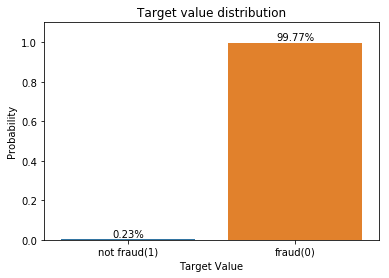

In [7]:
# full data
#num_fraud = 0
#num_not_fraud = 0
#for chunk in pd.read_csv('data/train.csv', chunksize=1000000, iterator=True):
#    num_fraud += chunk[chunk['is_attributed']==0].shape[0]
#    num_not_fraud += chunk[chunk['is_attributed']==1].shape[0]

# sample data
num_fraud = sample_data[sample_data['is_attributed']==0].shape[0]
num_not_fraud = sample_data[sample_data['is_attributed']==1].shape[0]

prob_not_fraud = float(num_not_fraud) / float(num_not_fraud + num_fraud)
prob_fraud = float(num_fraud) / float(num_not_fraud + num_fraud)
ax = sns.barplot(x=['not fraud(1)', 'fraud(0)'], y=[prob_not_fraud, prob_fraud])
ax.set(xlabel='Target Value', ylabel='Probability', title='Target value distribution')
ax.set_ylim(0, 1.1)
for p, uniq in zip(ax.patches, [prob_not_fraud, prob_fraud]):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height+0.01,
            '{}%'.format(round(uniq * 100, 2)), ha="center") 

After a quick check of target value distribution as shown above, we do have an extremely imbalanced dataset. About 99.77% of the dataset are labeled as fraud click and only about 0.23% are not fraud click. Hence, we maybe need to include some data re-sampling strategies for handling this imbalanced label distribution.

The official testing data doesn't contain 'attributed_time' feature. So we will drop this feature out from the training data. Currently, we have six features '', Since the original content of the feature 'click_time' is recorded in UTC format. It would be more meaningful to round the values of 'click_time' down to an hour of the day. Then we can check to see if there is any special pattern of 'click_time' and also investigate the correlation between features.

In [8]:
# create a new feature which is based on the click time 
# UTC --> an hour of the day
# sample data
sample_data['click_time'] = pd.to_datetime(sample_data['click_time'])
sample_data['click_hr'] = sample_data['click_time'].dt.round('H').astype(str)
sample_data['click_hr'] = (sample_data['click_hr']).str[11:13].astype(int)
display(sample_data.head())

# kaggle test data
test_data_kaggle['click_time'] = pd.to_datetime(test_data_kaggle['click_time'])
test_data_kaggle['click_hr'] = test_data_kaggle['click_time'].dt.round('H').astype(str)
test_data_kaggle['click_hr'] = (test_data_kaggle['click_hr']).str[11:13].astype(int)
display(test_data_kaggle.head())

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,click_hr
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0,10
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0,14
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0,18
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0,5
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0,9


,click_id,ip,app,device,os,channel,click_time,click_hr
0,0,5744,9,1,3,107,2017-11-10 04:00:00,4
1,1,119901,9,1,3,466,2017-11-10 04:00:00,4
2,2,72287,21,1,19,128,2017-11-10 04:00:00,4
3,3,78477,15,1,13,111,2017-11-10 04:00:00,4
4,4,123080,12,1,13,328,2017-11-10 04:00:00,4


### Exploratory Visualization

In [9]:
checklist = ['ip', 'app', 'device', 'os', 'channel', 'click_hr']
dict_feature = dict()
for feature in checklist:
    dict_feature[feature] = set([])

## full data
#for chunk in pd.read_csv('data/train.csv', chunksize=1000000, iterator=True):
#    for feature in dict_feature.keys():
#        dict_feature[feature] = \
#            dict_feature[feature].union(set(chunk.groupby(feature).count().index))

# sample data
for feature in dict_feature.keys():
    dict_feature[feature] = \
        dict_feature[feature].union(set(sample_data.groupby(feature).count().index))

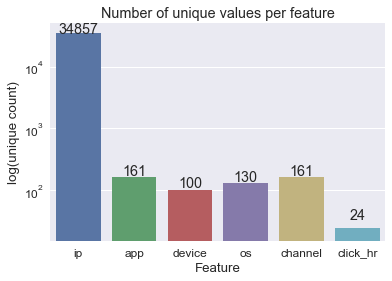

In [10]:
unique = []
for feature in checklist:
    unique.append(len(dict_feature[feature]))

sns.set(font_scale=1.2)
ax = sns.barplot(checklist, unique, log=True)
ax.set(xlabel='Feature', ylabel='log(unique count)', title='Number of unique values per feature')
for p, uniq in zip(ax.patches, unique):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 10,
            uniq, ha="center") 

From the above histogram, we can know that the except of the feature 'ip', which has the most categories, 34857, and the feature 'click_hr', which has surely 24 categories, the other features like 'app', 'device', 'os', and 'channel' only have about hundreds or thousands categories. This is quite consistent with our understanding of the meaning of these feature in the real world. 

The IP address can be IPv4 or IPv6. An IPv4 address has a size of 32 bits. IPv4 addresses are usually represented in dot-decimal notation, consisting of four decimal numbers, each ranging from 0 to 255, separated by dots, e.g., 172.16.254.1. IPv6 is a more complicated format of IP address in order to provide more addresses. The IP address is unique for eack device which is connected to the Internet. If two devices are connecting to the Internet in the same time, they definitely won't use the same IP address.

The 'app' feature means the mobile applications which users are using to access some kinds of products. From my point of view, not all kinds of mobile applications will access some specific products. So it's quite reasonable that there are only hundreds of them are included here. The 'device' feature is the device type id of user mobile phone (e.g., iphone 6 plus, iphone 7, huawei mate 7, etc.). There are also lots of brands on the market and Each brand normally will sell many kinds of mobiles year by year. The 'os' feature stands for the OS version of user mobile phone. Roughly, there are mainly two kind of operation systems of mobile phone, iOS and Android. There are also branches and subversion of them. Each mobile company will sometime develop their own operation system based on the iOS or Android. The 'channel' feature stands for the channel ID of mobile ad publisher. Maybe there are lots of mobile ad publishers in China. but 200 is a reasonable number of mobile ad publishers that one product are correlated with.

Ref: https://en.wikipedia.org/wiki/IP_address

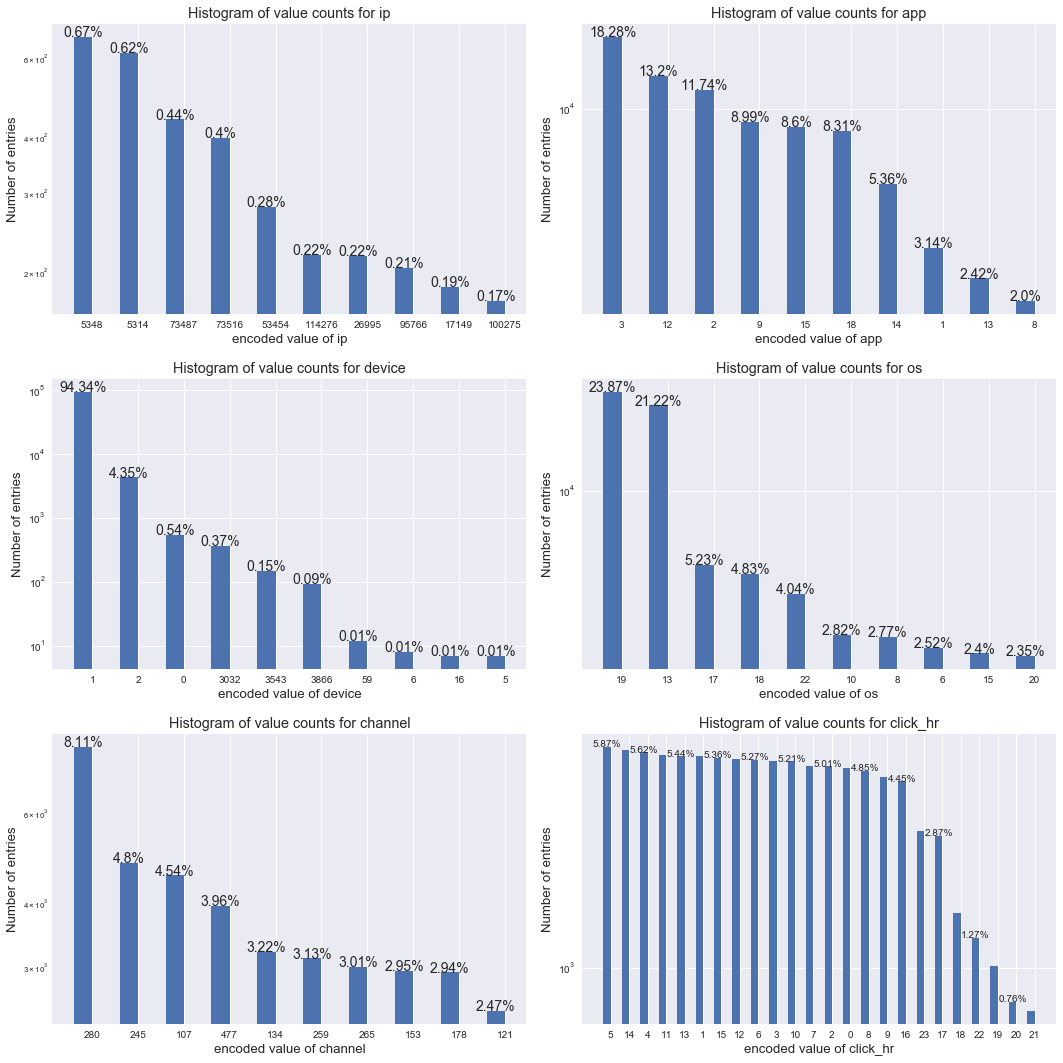

In [11]:
fig = plt.figure(figsize=(15,15))
n_top = 10
for idx, feature in enumerate(checklist):
    if feature != 'click_hr':
        n_top = 10
    else:
        n_top = 24
    
    counts = sample_data[feature].value_counts()

    ind = np.arange(n_top)
    width = 0.40
    
    ax = fig.add_subplot(3, 2, idx+1)
    plt.bar(ind, counts.head(n_top).values, width=width)
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(counts.head(n_top).index)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.tick_params(axis='both', which='minor', labelsize=8)
    #plt.hist(counts.values, bins=100)
    ax.set_yscale('log', nonposy='clip')
    plt.title("Histogram of value counts for {}".format(feature))
    plt.ylabel('Number of entries')
    plt.xlabel('encoded value of '+feature)

    if feature != 'click_hr':
        bar_text_size = 14
    else:
        bar_text_size = 10
    idx_bin = 0
    for p, uniq in zip(ax.patches, counts.head(n_top).values):
        if feature == 'click_hr':
            if idx_bin % 2 != 0:
                idx_bin += 1
                continue
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height+0.01,
                '{}%'.format(round(float(uniq) / (num_fraud + \
                                                  num_not_fraud) * 100, 2)), 
                size=bar_text_size,
                ha="center")
        idx_bin += 1
    
    max_count = np.max(counts)
    min_count = np.min(counts)
    gt = [10, 100, 1000]
    prop_gt = []
    for value in gt:
        prop_gt.append(round((counts > value).mean()*100, 2))

plt.tight_layout()       
plt.show()

The above histograms show the 10 most frequent values of click data w.r.t. discrete categorical features, 'ip', 'app', 'device', 'os' and 'channel', except the lower right one which shows the all click data in each hour of a day. It's quite obvious there are some dominant entries for 'device' and 'os'. For the middle left bar chart of 'device', the first entry is in the majority, which is ~94.34%. By taking the second entry (~4.35%) into account. Maybe this tells us that the market share of some mobile phone are dominant in China. It can be iphone, mi or huawei. For the middle right bar chart of 'os', we can also easily find the first two entries, 23.87% and 21.22%, are relatively higher than the others. This is also quite consistent with my understanding. They can be iOS or some Android system. It's also quite possible that these two features, 'device' and 'os', are correlated with each other since the type of operation system is often determined by the mobile phone. For example, you can only use iOS on iphone and Android on the other mobile phones like mi, sony, huawei, etc.

For the lower right bar chart of 'click_hr', we can find the distribution of click data is quite even among every hour of a day except those hours of evening. There is no precise definition for evening in terms of clock time, but it is considered to start around 5 p.m. - 6 p.m and to last until nighttime or bedtime. This is quite strange for me because originally I think people will have more time to use mobile when they get off duty. This is a little counterintuitive for me. Maybe people have less time to use their mobile because they have to be with their family or do other things like sports in the evening. And they often feel bored when they are working so they like to use their mobile in the daytime. It should be noted that we only show the percentage of odd bins due to the limited space of bar chart.

Ref: https://en.wikipedia.org/wiki/Evening

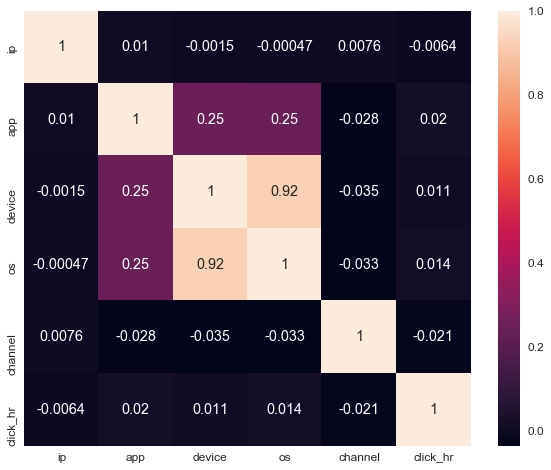

In [12]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(sample_data.loc[:, sample_data.columns != 'is_attributed'].corr(), annot=True, ax=ax)

From the above heat map, we can clearly figure out the correlations between different features. Let's say the correlation between any two features is high if the value of the corresponding block is above 0.5. Then we can maybe claim that we do find some pairs of features which exhibit some degree of correlation. It's obvious that features 'device' and 'os' are highly correlated with each other as we have expected before. But it's also quite interesting that there are very small correlation between the feature 'app', 'os' and 'device'. This can be explained by that there are some apps which are OS or device exclusive limited version.

### Algorithms and Techniques

Basically, two kinds of classifiers will be built: one is based on the '**Random Forest**'; the other is based on the '**Neural Network**'. The former algorithm, 'Random Forest', is an ensemble learning algorithm. The basic idea of ensemble is quite straightforward. The combination of learning models (learners) increases the classification accuracy and makes itself more robust. For 'Random Forest', the learner is a 'Decision Tree'. 'Decision Tree' is very easy to understand and interpret when there are few decisions and outcomes included in the tree. Generally, it also make lower cost of calculation and can handle both continuous values or categorical variables of data. But 'Decision Tree' tends to overfit the data, that is, it doesn't generally learn something from the data but just only memorize them. It somehow can make terrible prediction on those unseen data (testing). Through combining each individual tree into a 'forest', we take all the contributions for each tree into account like 'averaging/voting their results'. The variance among these trees decreases when compared to a single decision tree. And we can then have an overall better model. Besides, such tree-based algorithm can handle either numerical or categorical data as input quite well. The following image shows the process of 'Random Forest':

<img src="image/Random-Forest-Introduction.jpg" alt="Drawing"/>
(picture credit: DataSpriant)

The following hyper-parameters will/can be tuned to optimize the Random Forest classifier:
- The number of trees in the forest.
- The number of features to consider when looking for the best split.
- The maximum depth of the tree.
- The minimum number of samples required to be at a leaf node.

It should be noted that I am not going to change the parameter 'criterion'. I will use the default setting of this parameter. That means the basic tree learner would be based on CART (classification and regression tree) algorithm and Gini impurity.  

The latter algorithm, 'neural network', or so-called Multi-layer Perceptrons (MLPs), is also a very primary algorithm for solving a linear or non-linear classification problem. 2-3 fully connected hidden layers will be come after the input layer. Then the output layer will be passed through a sigmoid function for converting the output values as probabilities. Furthermore,  the following hyper-parameters can be tuned to find the best combination for our Neural Network classifier:
- The number of neurons of each hidden layer
- The activation function of each hidden layer
- The optimization algorithm used for training the neural network
- The step-size in updating the weights

And due to the large size of our sample data and also the full data, mini-batch gradient descent method would be our choice when we train our neural network classifier. 

Ref.: https://en.wikipedia.org/wiki/Random_forest <br>
Ref.: http://dataaspirant.com/2017/05/22/random-forest-algorithm-machine-learing/ <br>
Ref.: http://scikit-learn.org/stable/modules/neural_networks_supervised.html

Besides, a useful technique '**grid search**' will be included in this analysis for finding the best combinations of
hyper-parameters of a model. The hyper-parameters cannot be directly learned from the regular training process but can only be fixed before the actual training process begins. 

As mentioned before, our dataset was extremely imbalanced. Only very few fraction of data are not labeled as fraudulent. Such imbalanced distribution of data can possibly induce the biased prediction of model. For example, the data of majority classes can take much more attentions when we try to training a classifier. This is known as frequency bias. Many machine learning algorithms place tend to put more emphasis on learning from data observations which occur more commonly. **Resampling strategies** such as over/undersampling are necessary here. Three kinds of data samples will respectively be used for training our random forest classifier and neural network classifier:
- The original data sample
- New data sample generated by oversampling algorithm, Synthetic Minority Oversampling Technique (SMOTE). The SMOTE generates new observations by interpolating between observations in the original dataset.
- New data sample generated by undersampling algorithm, 'Tomek's links'. This kind of undersampling method is more like a cleaning under-sampling techniques. It will implement an heuristic which will clean the dataset based on Tomek's links. A Tomek's link between two samples of different class x and y is defined such that there is no example z as follows: $d(x, y) < d(x, z)$ or $d(y, z) < d(x, y)$, where d() stands for the distance between the samples and x and y are from different class respectively. That is, a Tomek's link only exists when the two samples are the closest neighbors of each other. When we find a pair of samples with a Tomek's link, the default setting of this algorithm will remove the one from the majority class.

It should be noted that this analysis focuses on finding the best strategy for establishing a most powerful or at least a not-that-bad classifier with the tools and algorithms we are going to try to use and implement. We are not going to find the best oversampling or undersampling method but will only try one of oversampling and undersampling respectively. There are still many resampling methods for further study but will be not include in this study.

Validation results produced by different classifier-sample combinations will be compared to each other and help us to determine the most suitable one for our analysis.

Ref.: https://www.jeremyjordan.me/imbalanced-data/ <br>
Ref.: http://contrib.scikit-learn.org/imbalanced-learn/stable/index.html <br>

### Benchmark
This project is actually taken from one of Kaggle competitions. They provide a benchmark model which is developed by a random forest method. The score of this benchmark model is 0.911. And the score is evaluated on area under the Receiver operating characteristic (ROC) curve between the predicted probability and the observed target.

## III. Methodology

### Data Preprocessing
Since the original full data is too large, the data sample '**train_sample.csv**' will be used for training and validation/testing in this analysis. And the final score will be evaluated by using the full data in order to compare our results with the official benchmark model. Before implementing the learning algorithms, several steps for preprocessing our sample data are necessary and listed below:
- Rounding the values of 'click_time' down to an hour of the day, '**click_hr**'. (This step had been done in the section of 'Data Exploration')
- The order data sample will be randomized/shuffled before splitting it into a training set and a validation set. The proportion of the dataset to include in the train split is 80%. The rest part will be included in our validation/testing set. It should be noted that the training and testing sets hold the same target value distribution as the original data sample.
- Generating two kinds of new data samples based on the original data sample:
  - oversampling data produced by SMOTE.
  - undersampling data produced by 'Tomek's link' method.

In [13]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from collections import Counter

RANDOM_SEED = 10 # 10:for model developement, None: sensitivity analysis

feature_list = ['ip', 'app', 'device', 'os', 'channel', 'click_hr']
target_list = ['is_attributed']

# pretreatment
X = sample_data.loc[:, feature_list]
y = sample_data['is_attributed']
kaggle_X = test_data_kaggle.loc[:, feature_list]

# splitting the data into training set and testing set
X_original_train, X_original_test, y_original_train, y_original_test = \
                            train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=RANDOM_SEED)
print 'Before resampling: '+str(sorted(Counter(y_original_train).items()))
print

# resampling (oversampling and undersampling)
print 'Technique: SMOTE'
X_over_train, y_over_train = SMOTE(random_state=RANDOM_SEED).fit_sample(X_original_train, y_original_train)
print 'After oversampling: '+str(sorted(Counter(y_over_train).items()))
print

print "Technique: Tomek's links"
X_under_train, y_under_train = TomekLinks(random_state=RANDOM_SEED).fit_sample(X_original_train, y_original_train)
print 'After undersampling: '+str(sorted(Counter(y_under_train).items()))

X_train_list = [X_original_train, X_over_train, X_under_train]
y_train_list = [y_original_train, y_over_train, y_under_train]

Before resampling: [(0, 79818), (1, 182)]

Technique: SMOTE
After oversampling: [(0, 79818), (1, 79818)]

Technique: Tomek's links
After undersampling: [(0, 79756), (1, 182)]


### Implementation
Two kinds of algorithms for solving classification problem will be implemented here:
- random forest ensemble method
- multi-layer perceptron (neural network)

The implementation is basically done in 3 steps:
1. Create a pipeline function to execute the model with different samples and record the metrics.
2. Create models based on the above two algorithms respectively and pass them to the pipeline function we established in step 1 for training and testing.
3. Visualizing the metrics for evaluating performances of different models.

As mentioned before, the performance of a model is basically evaluated by using AUC (the area under the Receiver operating characteristic (ROC) curve between the predicted probability and the observed target). The value of AUC varies from 0 to 1. Our goal here is to chasing a model with higher AUC value. Although there are some potential misleading problems when people evaluate the model performance totally based on AUC. But we are not going to focus on this part. They maybe can be some further studies.

Ref: https://academic.oup.com/bioinformatics/article/26/6/822/244957 <br>
Ref: https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1466-8238.2007.00358.x

The prototype of our random forest model is established directly by using the module 'RandomForestClassifier' implemented in the widely-used free machine learning library sklearn. In this prototype model, the values of selected tunable hyper-parameters are followed by using default setting:
- The number of trees in the forest, ```n_estimators=10```
- The number of features to consider when looking for the best split, ```max_features=sqrt(n_features)```
- The maximum depth of the tree, ```max_depth=None```. This means nodes are expanded until all leaves are pure or until all leaves contain less than 2.
- The minimum number of samples required to be at a leaf node, ```min_samples_leaf=1```

Ref.: http://scikit-learn.org/stable/

In [14]:
def prediction_converter(raw_preds, inv=False):
    preds = []
    for p in raw_preds:
        if inv:
            preds.append(p[0])
        else:
            preds.append(1 - p[0])
    
    return preds

In [15]:
from sklearn import metrics 
from sklearn.base import clone
from collections import Counter

def model_with_different_samples(X_train, X_test, y_train, y_test, model):
    results = {'ordinary': {}, 'resampling': {}}

    # ------ ORIGINAL (W/O RESAMPLING) ------
    model_0 = clone(model)
    model_0.fit(X_train[0], y_train[0])
    predictions = model_0.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, predictions)
    print '(ORIGINAL) accuracy = '+str(accuracy)
    precision, recall, fscore, support = \
        metrics.precision_recall_fscore_support(y_test, predictions)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
    auc = metrics.auc(fpr, tpr)

    results['ordinary'] = {'accuracy': accuracy, \
                           'precision': precision, \
                           'recall': recall, \
                           'fscore': fscore, \
                           'n_occurences': support, \
                           'predictions_count': Counter(predictions), \
                           'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn, \
                           'fpr': fpr, 'tpr': tpr, 'thres': thresholds, \
                           'auc': auc}

    # ------------ OVERSAMPLING TECHNIQUES (SMOTE) ------------
    model_os = clone(model)
    model_os.fit(X_train[1], y_train[1])
    predictions = model_os.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, predictions)
    print '(OVERSAMPLING) accuracy = '+str(accuracy)
    precision, recall, fscore, support = \
        metrics.precision_recall_fscore_support(y_test, predictions)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
    auc = metrics.auc(fpr, tpr)

    results['resampling']['oversampling (SMOTE)'] = {'accuracy': accuracy, \
                                                     'precision': precision, \
                                                     'recall': recall, \
                                                     'fscore': fscore, \
                                                     'n_occurences': support, \
                                                     'predictions_count': Counter(predictions), \
                                                     'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn, \
                                                     'fpr': fpr, 'tpr': tpr, 'thres': thresholds, \
                                                     'auc': auc}

    # ------------ UNDERSAMPLING TECHNIQUES (Tomek's links) ------------
    model_us = clone(model)
    model_us.fit(X_train[2], y_train[2])
    predictions = model_us.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, predictions)
    print '(UNDERSAMPLING) accuracy = '+str(accuracy)
    precision, recall, fscore, support = \
        metrics.precision_recall_fscore_support(y_test, predictions)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
    auc = metrics.auc(fpr, tpr)

    results['resampling']['undersampling (Tomeks_links)'] = {'accuracy': accuracy, \
                                                             'precision': precision, \
                                                             'recall': recall, \
                                                             'fscore': fscore, \
                                                             'n_occurences': support, \
                                                             'predictions_count': Counter(predictions), \
                                                             'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn, \
                                                             'fpr': fpr, 'tpr': tpr, 'thres': thresholds, \
                                                             'auc': auc}

    return [model_0, model_os, model_us], results

In [16]:
def evaluate_method(results, method, metrics = ['precision', 'recall', 'fscore']):
    fig, ax = plt.subplots(1, 7, sharey=True, figsize=(18, 6))

    for i, metric in enumerate(metrics):
        ax[i*2].axhline(results['ordinary'][metric][0], label='No Resampling')
        ax[i*2+1].axhline(results['ordinary'][metric][1], label='No Resampling')

        ax[0].legend(loc='upper center', bbox_to_anchor=(9, 1.01),
                     ncol=1, fancybox=True, shadow=True, fontsize=10)

        for j, (technique, result) in enumerate(results[method].items()):
            if j + 1 == 1:
                color = 'g'
            else:
                color = 'b'
            ax[i*2].bar(j+1, result[metric][0], label=technique, color=color)
            ax[i*2+1].bar(j+1, result[metric][1], label=technique, color=color)

        ax[i*2].set_title('fraud: \n'+str(metric))
        ax[i*2+1].set_title('not fraud: \n'+str(metric))

    # AUC vis
    ax[6].set_title('Area under curve')
    ax[6].axhline(results['ordinary']['auc'], label='No Resampling')
    print 'ordinary: '+str(results['ordinary']['auc'])
    for j, (technique, result) in enumerate(results[method].items()):
        if j + 1 == 1:
            color = 'g'
        else:
            color = 'b'
        print technique+': '+str(result['auc'])
        ax[6].bar(j+1, result['auc'], label=technique, color=color)
        
    fig_auc, ax_auc = plt.subplots(1, 3, figsize=(18, 6))
    ax_auc[0].set_title('Receiver Operating Characteristic \n (No Resampling)')
    ax_auc[0].plot(results['ordinary']['fpr'], results['ordinary']['tpr'], label='AUC = %0.4f'% results['ordinary']['auc'])
    for j, (technique, result) in enumerate(results[method].items()):
        ax_auc[j+1].set_title('Receiver Operating Characteristic \n ('+technique+')')
        ax_auc[j+1].plot(result['fpr'], result['tpr'], label='AUC = %0.4f'% result['auc'])
    for idx in range(3):
        ax_auc[idx].legend(loc='lower right')
        ax_auc[idx].plot([0,1],[0,1],'r--')
        ax_auc[idx].set_xlim([-0.001, 1])
        ax_auc[idx].set_ylim([0, 1.001])
        ax_auc[idx].set_ylabel('True Positive Rate')
        ax_auc[idx].set_xlabel('False Positive Rate')
    #plt.show()    

In [17]:
def draw_AUC(model_list, test_data, test_target):
    fig_auc, ax_auc = plt.subplots(1, 3, figsize=(18, 6))
    
    for idx in range(len(model_list)):
        prediction = model_list[idx].predict_proba(test_data)
        val_preds = prediction_converter(prediction)
    
        fpr, tpr, thresholds = metrics.roc_curve(test_target, val_preds)
        roc_auc = metrics.auc(fpr, tpr)
        
        if roc_auc < 0.5:
            val_preds = prediction_converter(prediction, inv=True)
            fpr, tpr, thresholds = metrics.roc_curve(test_target, val_preds)
            roc_auc = metrics.auc(fpr, tpr)
            
        if idx == 0:
            ax_auc[idx].set_title('Receiver Operating Characteristic \n (No Resampling)')
        elif idx == 1:
            ax_auc[idx].set_title('Receiver Operating Characteristic \n (oversampling (SMOTE))')
        elif idx == 2:
            ax_auc[idx].set_title('Receiver Operating Characteristic \n (undersampling (Tomeks_links))')
            
        ax_auc[idx].plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)

        ax_auc[idx].legend(loc='lower right')
        ax_auc[idx].plot([0,1],[0,1],'r--')
        ax_auc[idx].set_xlim([-0.001, 1])
        ax_auc[idx].set_ylim([0, 1.001])
        ax_auc[idx].set_ylabel('True Positive Rate')
        ax_auc[idx].set_xlabel('False Positive Rate')

C:\Users\MLUSER\AppData\Local\conda\conda\envs\my_root\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(ORIGINAL) accuracy = 0.99775
(OVERSAMPLING) accuracy = 0.99685
(UNDERSAMPLING) accuracy = 0.9976


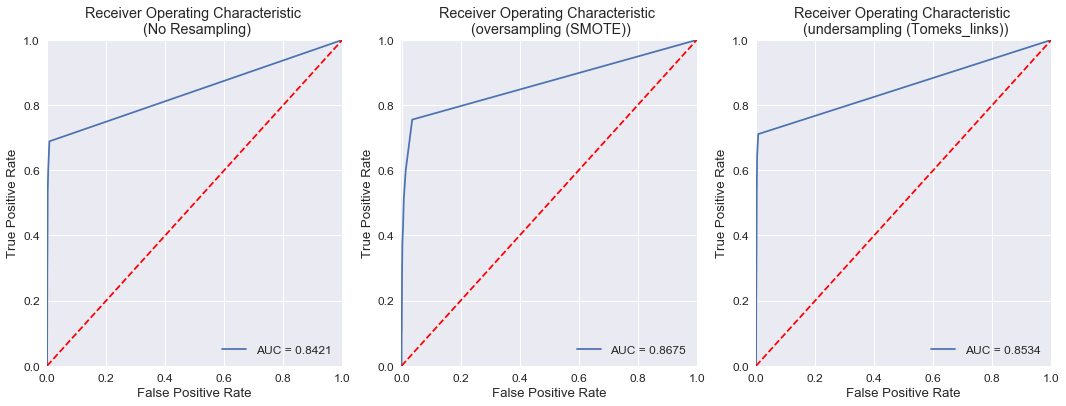

In [18]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(bootstrap=False, random_state=10)

model_rf_list, results_rf = model_with_different_samples(X_train_list, X_original_test, \
                                                         y_train_list, y_original_test, model_rf)

#evaluate_method(results_rf, 'resampling')
draw_AUC(model_rf_list, X_original_test, y_original_test)

From the above visualization of modeling results, which are evaluated by using testing set of data sample, the random forest models trained by using different training data samples can almost reach the same accuracy, ~99.7%. The AUC scores are also quite good, 0.83 ~ 0.85, but not enough to be compared with the benchmark one, which has 0.911 AUC score. And there are still rooms for improvements.

Now let's turn to the neural network. The prototype of our MLP classifier is established by using the module 'MLPClassifier' implemented in sklearn library. As mentioned before, we will only build a neural network with 2 to 3 hidden layers. For MLP classifier, the values of selected tunable hyper-parameters are followed by using the following setting:
- The number of neurons of each hidden layer, 64 neurons for first hidden layer and 32 neurons for the second hidden layer.
- The activation function of each hidden layer, ```activation='relu'```, the Rectified Linear Unit (ReLu).
- The optimization algorithm used for training the neural network, ```solver='adam'```, the Adaptive Moment Estimation method (Adam).
- The step-size in updating the weights, ```learning_rate_init=0.001```. A constant learning rate is adopted here.
- The size of mini-batches of training data for optimization, ```batch_size=64```
- The maximum number of iterations, ```max_iter=2```.

Ref: https://en.wikipedia.org/wiki/Rectifier_(neural_networks) <br>
Ref: https://arxiv.org/abs/1412.6980

C:\Users\MLUSER\AppData\Local\conda\conda\envs\my_root\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\MLUSER\AppData\Local\conda\conda\envs\my_root\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(ORIGINAL) accuracy = 0.99775
(OVERSAMPLING) accuracy = 0.97
(UNDERSAMPLING) accuracy = 0.99755


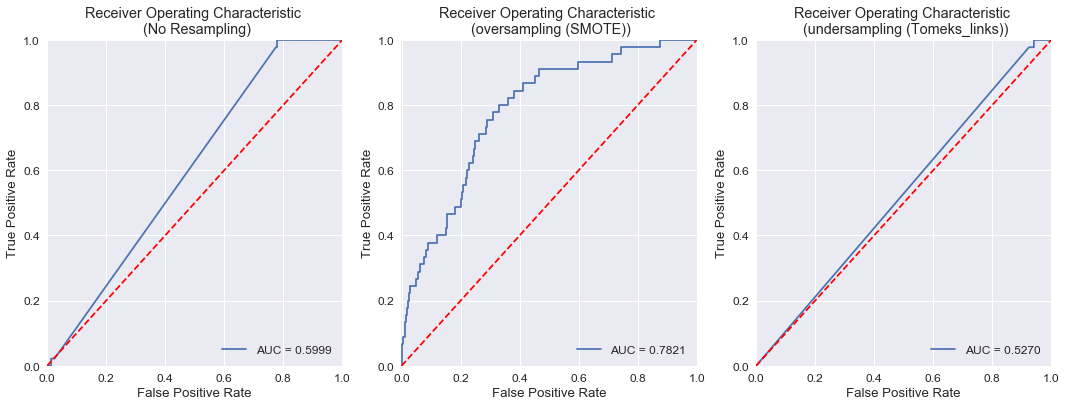

In [19]:
from sklearn.neural_network import MLPClassifier

model_nn = MLPClassifier(solver='adam', activation='relu', hidden_layer_sizes=(32, 64), max_iter=3, \
                         batch_size=64, learning_rate_init=0.005, random_state=10, verbose=0)
model_nn_list, results_nn = model_with_different_samples(X_train_list, X_original_test, \
                                                         y_train_list, y_original_test, model_nn)

#evaluate_method(results_nn, 'resampling')
draw_AUC(model_nn_list, X_original_test, y_original_test)

From the above visualization of modeling results, which are also evaluated by using testing set of data sample, the MLP classifiers trained by using different training data samples show a little bit different accuracy, ~99.78% for ordinary sample and new sample produced by undersampling. The one trained with oversampling data set shows less accuracy ~94.2%. The AUC scores of different MLP classifiers vary from ~0.54 to ~0.73. The classifier trained with oversampling data set perform relatively better than the other two with ~0.73 AUC score. The one trained with undersampling data set only give a not-that-good prediction, ~0.54 AUC score, which is only a little bit better than random guessing. Of course, none of them can be good enough to be compared with the benchmark one, which has 0.911 AUC score. It's quite obvious that there are also still rooms for improving our MLP classifier(s).

We can also have a quick conclusion of the resampling strategy. There is no significant difference contributed by using resampling samples for training a random forest classifier with current setting. But when we using oversampling data set to train our MLP classifier, it shows such there is 10~15% improvement in predicting the testing split of the original data sample. So from now on, in this analysis, the random forest classifier will always be trained without taking resampling into account. And the oversampling method will be adopted as the most proper treatment of the extremely imbalanced data for training a random forest MLP classifier.

### Refinement

The GridSearchCV technique implemented in the library ```sklearn``` uses an estimator and a set of hyper-parameters to exhaustively generates model candidates and also evaluates them with proper/user-defined metric score. Hence, user can know the most optimal combination of hyper-parameters systematically. Two kinds of algorithms in this analysis will be tuned separately.

For our random forest classifier, a searching grid is built as follows:

| hyper-parameter |    testing values   |
|-----------------|---------------------|
|   n_estimators  | 10, 15, 20, 50, 100 |
|   max_features (ratio) |       0.3, 0.5, 0.7       |
|     max_depth   |    None, 6, 10, 12   |
| min_samples_leaf|  1, 10, 20, 60  |

On the other hand, the best combination of our MLP classifier's hyper parameter will be searched according to the following table:

|    hyper-parameter    |        testing values         |
|-----------------------|-------------------------------|
|         solver        |    'lbfgs', 'sgd', 'adam'     |
|       activation      |  'logistic', 'tanh', 'relu'   |
|  hidden_layer_sizes   | (16, 16), (32, 32), (64, 64), (128, 128) |
|  learning_rate_init   |  0.001-0.01, step sizz=0.001   |

For the solver of optimization algorithm, the 'lbfgs' stands for 'Limited-memory BFGS' while 'sgd' is the abbreviation of 'Stochastic gradient descent'. The 'logistic' function of the hyper-parameter 'activation' is also known as the Sigmoid function.

Ref.: https://en.wikipedia.org/wiki/Limited-memory_BFGS<br>
Ref.: https://en.wikipedia.org/wiki/Stochastic_gradient_descent<br>
Ref.: https://en.wikipedia.org/wiki/Activation_function

In [20]:
def draw_AUC_standalone(model, test_data, test_target):
    fig_auc, ax_auc = plt.subplots(1, 1, figsize=(6, 6))
    
    prediction = model.predict_proba(test_data)
    val_preds = prediction_converter(prediction)
    
    fpr, tpr, thresholds = metrics.roc_curve(test_target, val_preds)
    roc_auc = metrics.auc(fpr, tpr)
        
    if roc_auc < 0.5:
        val_preds = prediction_converter(prediction, inv=True)
        fpr, tpr, thresholds = metrics.roc_curve(test_target, val_preds)
        roc_auc = metrics.auc(fpr, tpr)
            
    ax_auc.set_title('Receiver Operating Characteristic \n (MLP)')
            
    ax_auc.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)

    ax_auc.legend(loc='lower right')
    ax_auc.plot([0,1],[0,1],'r--')
    ax_auc.set_xlim([-0.001, 1])
    ax_auc.set_ylim([0, 1.001])
    ax_auc.set_ylabel('True Positive Rate')
    ax_auc.set_xlabel('False Positive Rate')

In [21]:
def custom_make_score(estimator, X, y):
    global X_original_test, y_original_test
    X = X_original_test
    y = y_original_test
    
    prediction = estimator.predict_proba(X)
    val_preds = prediction_converter(prediction)
    
    fpr, tpr, thresholds = metrics.roc_curve(y, val_preds)
    roc_auc = metrics.auc(fpr, tpr)
    
    if roc_auc < 0.5:
        val_preds = prediction_converter(prediction, inv=True)
        fpr, tpr, thresholds = metrics.roc_curve(y, val_preds)
        roc_auc = metrics.auc(fpr, tpr)
        
    return roc_auc

In [32]:
#from sklearn.model_selection import learning_curve, GridSearchCV
#from sklearn.grid_search import GridSearchCV 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# grid search of random forest classifier
rf_tuned_parameters = {'n_estimators': [10, 15, 20, 50, 100], 
                       'max_features': [0.3, 0.5, 0.7],
                       'max_depth': [None, 6, 10, 12],
                       'min_samples_leaf': [1, 10, 20, 60]}

tmp_model_rf_gs = RandomForestClassifier(bootstrap=False, random_state=RANDOM_SEED)

model_rf_gs = GridSearchCV(tmp_model_rf_gs, param_grid=rf_tuned_parameters, \
                           #scoring=custom_make_score, cv=2, iid=False, n_jobs=4, verbose=1)
                           scoring='roc_auc', iid=False, n_jobs=1, verbose=1)

model_rf_gs.fit(X_original_train, y_original_train) # original sample is fine!

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed: 36.9min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=1,
       param_grid={'n_estimators': [10, 15, 20, 50, 100], 'max_features': [0.3, 0.5, 0.7], 'max_depth': [None, 6, 10, 12], 'min_samples_leaf': [1, 10, 20, 60]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

Best parameters set found on development set:
{'max_features': 0.3, 'n_estimators': 50, 'max_depth': 12, 'min_samples_leaf': 20}



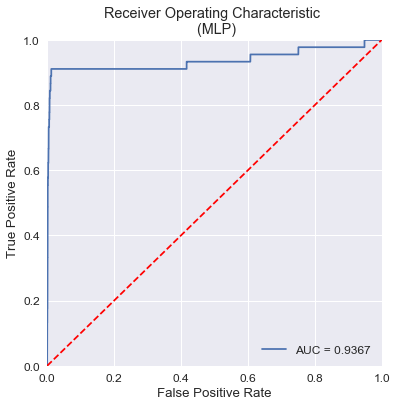

In [35]:
print("Best parameters set found on development set:")  
print(model_rf_gs.best_params_)  
print

draw_AUC_standalone(model_rf_gs, X_original_test, y_original_test)

In [37]:
# grid search of MLP classifier
nn_tuned_parameters = {'solver': ['lbfgs', 'sgd', 'adam'], 
                       'activation': ['logistic', 'tanh', 'relu'],
                       'hidden_layer_sizes': [(16, 16), (32, 32), (64, 64), (128, 128)],
                       'learning_rate_init': np.arange(0.001, 0.01, 0.001)}

tmp_model_nn_gs = MLPClassifier(solver='adam', activation='relu', hidden_layer_sizes=(64, 32), max_iter=3, \
                                batch_size=64, learning_rate_init=0.008, random_state=RANDOM_SEED, verbose=0)

model_nn_gs = GridSearchCV(tmp_model_nn_gs, param_grid=nn_tuned_parameters, \
                           #scoring=custom_make_score, cv=2, iid=False, n_jobs=4, verbose=1)
                           scoring='roc_auc', iid=False, n_jobs=1, verbose=1)

model_nn_gs.fit(X_over_train, y_over_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 972 out of 972 | elapsed: 92.1min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size=64, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(64, 32), learning_rate='constant',
       learning_rate_init=0.008, max_iter=3, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=10, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=1,
       param_grid={'activation': ['logistic', 'tanh', 'relu'], 'hidden_layer_sizes': [(16, 16), (32, 32), (64, 64), (128, 128)], 'learning_rate_init': array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009]), 'solver': ['lbfgs', 'sgd', 'adam']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

Best parameters set found on development set:
{'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.008, 'hidden_layer_sizes': (16, 16)}



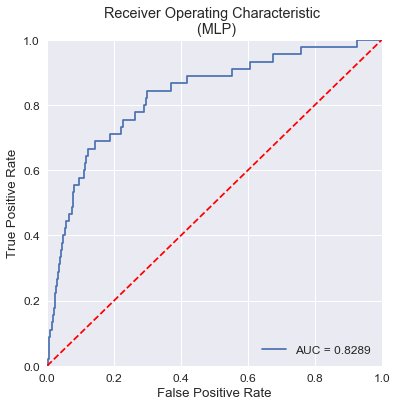

In [38]:
print("Best parameters set found on development set:")  
print(model_nn_gs.best_params_)  
print

draw_AUC_standalone(model_nn_gs, X_original_test, y_original_test)

The process of tuning hyper-parameters of a model can be extremely time-consuming. It depends on how many possible values they can be. The following table shows the results of refinement:

| Random Forest |    Multi-layer Perceptrons   |
|-----------------|---------------------|
|   n_estimators = 50  | solver = 'adam' |
|   max_features = 0.3 |      activation = 'relu'       |
|     max_depth = 12  |    hidden_layer_sizes = (128, 128)   |
| min_samples_leaf = 20|  learning_rate_init = 0.005  |

The improvement of our random forest classifier in the testing split of data sample is ~11% on AUC scoring while the performance gain of tuning MLP classifier is ~15% on AUC scoring. From the following picture, the AUC score of our final random forest classifier is 0.9367 which seems already better than the benchmark model's performance. The AUC score of MLP classifier after tuning is 0.8384. This score is still quite far from saying that we have a good result by comparing it to the benchmark model. But so far, all of these results are only based on the training data sample. In next section, our two classifiers will be evaluated by using the official testing data set.

## IV. Results

### Model Evaluation and Validation

In [45]:
RUN_KAGGLE_TEST = False

if RUN_KAGGLE_TEST:
    #
    # predict kaggle testing data set for random forest classifier
    #
    pred_kaggle = model_rf_gs.predict_proba(kaggle_X)
    pred_kaggle = prediction_converter(pred_kaggle)
    submission_table = pd.DataFrame()
    submission_table['click_id'] = test_data_kaggle['click_id'].astype('int')
    submission_table['is_attributed'] = pred_kaggle
    submission_table.to_csv('rf_gs_20190530.csv',index=False)

    #
    # predict kaggle testing data set for MLP classifier
    #
    submission_table = pd.DataFrame()
    submission_table['click_id'] = test_data_kaggle['click_id'].astype('int')
    submission_table['is_attributed'] = None
    pred_batch = 20000
    total_step = kaggle_X.shape[0]/pred_batch
    for row in range(total_step):
        submission_table.set_value(range(row*pred_batch, (row+1)*pred_batch), \
                                   'is_attributed', \
                                   1-model_nn_gs.predict_proba(kaggle_X[row*pred_batch:(row+1)*pred_batch])[:, 0])
    submission_table.set_value(range(total_step*pred_batch, kaggle_X.shape[0]), \
                               'is_attributed', \
                               1-model_nn_gs.predict_proba(kaggle_X[total_step*pred_batch:])[:, 0])
    submission_table.to_csv('nn_gs_20190530.csv',index=False)

Below we can see the final AUC scores of two kinds of classifier evaluated by using Kaggle testing data (test.csv). This help us to judge whether the model generalizes well to unseen data or not. The random forest classifier receives 0.9183 AUC score while the MLP classifier performances a little bad with only 0.6966. It's quite obvious that our random forest classifier shows less difference between evaluating by testing split of sample data and official testing data set. It seems the model based on random forest algorithm can be our final choice to beat the benchmark model under current setting.

<img src="image/rf_gs_evaluation_kaggle.PNG" alt="Drawing" style="width: 700px;"/>
<img src="image/nn_gs_evaluation_kaggle.PNG" alt="Drawing" style="width: 700px;"/>

Furthermore, in order to validate the robustness of the above two models, we try to manipulate the input data and also the environment by using a different random seed in the steps of data splitting and the generating prototype of model before refinement. After re-running the whole modeling process 5 times with different random seeds, the AUC scores of random forest classifier vary from 0.9060 to 0.9183 while the range of MLP classifier is from 0.6716 to 0.6976. The final AUC scores returned from official Kaggle evaluation are with small variations 1~4%.

Although the final AUC score, 0.9180, does beat the benchmark model, it is actually not a very good result in this Kaggle competition. The current ranking is 2631-th of 3216 teams. The top AUC scoring is 0.9827 and this means we still have long way to go.

### Justification

It seems we had a luck shot to get a model which could just beat the benchmark model with very small improvements. There were already about 10-15% improvements even we only tuned few hyper-parameters and also very limited searching space. And, by comparing the evaluation results with the usage of different testing date set, we could say that our final random forest classifier was quite robust with only 2% difference. Also, tt should be always noted that we only used ~5% of the original training data set to establish our model for solving this classification problem. So I think the model of random forest classifier is trusty and aligns well with our expected solutions outcomes with an acceptable correctness.

## V. Conclusion

### Free-Form Visualization

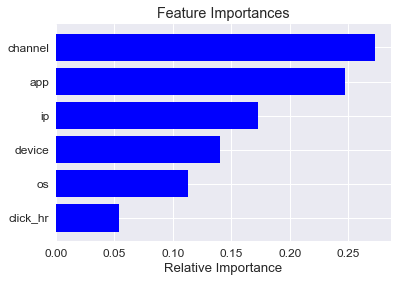

In [41]:
# final model: random forest with 'max_features': 0.3, 'n_estimators': 50, \
#                                 'max_depth': 12, 'min_samples_leaf': 20
final_model_rf = RandomForestClassifier(max_features=0.3, n_estimators=50, max_depth=12, \
                                        min_samples_leaf=20, bootstrap=False, random_state=RANDOM_SEED)
final_model_rf.fit(X_original_train, y_original_train)
importances_final_rf = final_model_rf.feature_importances_
indices = np.argsort(importances_final_rf)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances_final_rf[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_list[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The above picture shows the visualization of feature importances, which are extracted from our final random forest classifier. By investigating the important predictors in their order of importance, it can be observed that the feature 'channel' and 'app' are the two most important roles in our modeling. The features 'ip', 'device', and 'os' were less important and share quite closed relative importances to each other. The feature 'click_hr' is the most unimportant one. 

All the above results are quite consistent with my understanding. Since we are dealing with the clicking data of a mobile device, the advertisements provided by different mobile ad publishers have different styles even they are try to sale the same product. So people maybe will be attracted to click those spectacular advertisements and download their app. The second important feature 'app' deserve to be valued. An useful, fun or well-designed app will definitely be downloaded frequently. The third important feature 'IP' somehow can be treated as an unique identification of any user. Although sometime people will not always use the same IP to connect to the Internet. But it. And if today we are trying to identify any fraudulence, blocking the IP, which is suspected with their abnormal behavior, is the most efficient to reduce the risks of being hacking or other harmful thing like fraudulence. It's quite reasonable our random forest classifier choose this feature to distinguish between the fraudulent and non-fraudulent clicks. The features 'device' and 'os' are less important. This also makes sense. It's equally possible that every kind of devices or OS can be used to make fraudulent or non-fraudulent clicks. The most unimportant feature is 'click_hr'. This maybe just tells us that people can make click fraud anytime if they want.

### Reflection

The workflow of this project could be summarized using the following steps:
1. Defined the problem and collect data
2. Data exploration and preprocessing
3. Created a benchmark model
4. Trained the model with processed data.
5. Refined the model until the best combination of hyper-parameters was found
6. Evaluation and validation

There were two most difficult challenges in this analysis. The first one was the highly imbalanced distribution of data. And the second was how to choose an proper algorithm which could be best suited for the problem we wanted to solve. Also due to the lack of enough computing source, it was not easy for us to use the whole bunch of official training data. Training a model with insufficient data would reduce the prediction ability of our classifiers.

With experience and prior knowledge and also the outcome of AUC scoring on training data sample, we observed that random forest classifier performed better than the MLP classifier in this analysis. It should be noted that this didn't mean the random forest algorithm was always perform better than the neural network in classification problem. One more interesting thing here is that the significant improvements made by tuning the hyper-parameters of each classifier. 

To sum up, the final model and solution did fit my expectations for the problem. And of course different kinds of classification problem should always be reexamined like the data exploration and data preprocessing. But the basic workflow is in common use. Hence our model is enough to be treated as a general setting to solve these types of problems.

### Improvement

Generally, our model can be improved by trying the following strategies:
- Further Engineering features in order to explore much more hidden information of the data. Maybe some unsupervised clustering algorithm like Principal component analysis (PCA) or t-distributed Stochastic Neighbor Embedding (t-SNE) can be employed in this analysis.
- Training the model with much more data.
- Increasing the searching space of tuning the hyper-parameters
- Using a additional scoring metric like precision-recall curve.

In fact, there are also some improvements we can do for neural network algorithm. A less flexible module of neural network implemented in the library ```sklearn``` is employed in our original approach. The architecture of a neural network plays an important role in either regression or classification problem. We can try to use some state-of-the-art library like ```tensorflow``` to build a more complicated neural network and train it with more data. There are already some successful Kaggle cases which can prove this aspect.

Ref.: http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html <br>
Ref.: http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html <br>
Ref.: http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html <br>
Ref.: https://www.tensorflow.org/